[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

# Emissions

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=04-emissions/emissions.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/04-emissions/emissions.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/04-emissions/emissions.ipynb)

## Learning objectives

In this notebook we use the [cams-global-emission-inventories](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-emission-inventories?tab=overview) dataset. The dataset contains anthropogenic and natural emissions. We'll focus on nitrogen oxides (NOx). These come from several sources: agriculture, ships, power generation, road traffic, industry.

## Initial setup

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the Climate Data Store (CDS), intalling any other packages not already installed, setting up our CDS API credentials and importing the various Python libraries that we will need.

In [ ]:
# Ensure that the cdsapi package is installed
!pip install -q cdsapi

In [ ]:
# If you are running this notebook in Colab, uncomment the line below and run this cell.
#!pip install cartopy

### Add your ADS API credentials

To set up your ADS API credentials, please login/register on the [ADS](https://ads.atmosphere.copernicus.eu/), then you will see your [unique API key here](https://ads.atmosphere.copernicus.eu/api-how-to). 

You can add this API key to your current session by replacing `#########` in the code cell below with your API key.

In [1]:
import os
os.environ['CDSAPI_URL'] = 'https://ads.atmosphere.copernicus.eu/api/v2'
os.environ['CDSAPI_KEY'] = '###########################################'

### Import libraries

In [179]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcol
from matplotlib.colors import ListedColormap
import calendar
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [3]:
DATADIR = '.'

## Explore and download data

Visit the download form for the [CAMS global emission inventories](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-emission-inventories) data. View the parameters in the API script in the following cell and select the corresponding options. For each year there will be a netcdf file inside the zip that will be downloaded. The size of the file for one year is 370 MB. The data is available from year 2000 up to 2020.

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which should be identical to the code cell below.

**Please remember to accept the terms and conditions at the bottom of the download form.**


In [4]:
variable = 'nitrogen_oxides'
source = 'anthropogenic'
start_year = '2000'
#years = (np.array('2000', dtype=int) + np.arange(2)).tolist()
years = ['2000', '2020']

In [5]:
import cdsapi
c = cdsapi.Client()

In [83]:
c.retrieve(
    'cams-global-emission-inventories',
    {
        'variable': variable,
        'source': [
            source,
        ],
        'version': 'latest',
        'year': years,
        'format': 'zip',
    },
    f'{DATADIR}/download.zip')

2024-09-08 12:21:14,362 INFO Welcome to the ADS.
As per our announcements on the Forum, this instance of ADS will be decommissioned on 26 September 2024 and will no longer be accessible from this date onwards.
Please update your cdsapi package to a version >=0.7.0, create an account on ADS-Beta and update your .cdsapirc file. We strongly recommend users to check our Guidelines at https://confluence.ecmwf.int/x/uINmFw
2024-09-08 12:21:14,364 WARNING Move urgently to ads-beta
2024-09-08 12:21:14,366 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-emission-inventories
2024-09-08 12:21:14,399 INFO Request is queued
2024-09-08 12:21:15,420 INFO Request is running
2024-09-08 12:21:22,614 INFO Request is completed
2024-09-08 12:21:22,617 INFO Downloading https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-cams-global-emission-inventories-ce5bbf25-aa0d-487f-a424-5dfc4da7ea13.zip to ./download.zip (749.4M)
2024-0

Result(content_length=785826871,content_type=application/zip,location=https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-cams-global-emission-inventories-ce5bbf25-aa0d-487f-a424-5dfc4da7ea13.zip)

In [5]:
with ZipFile(f'{DATADIR}/download.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=f'{DATADIR}')

In [8]:
os.remove(f'{DATADIR}/download.zip')

## Emissions of NOx from all sectors
The dataset of each year contains the emissions from 13 sectors for 12 months

In [6]:
def dataset_path(year_index):
    year = years[year_index]
    ds_path = f'{DATADIR}/CAMS-GLOB-ANT_v4.2_nitrogen-oxides_{year}.nc'
    return ds_path

In [7]:
nox2000_ds_path = dataset_path(0)
nox2000_ds_path

'./CAMS-GLOB-ANT_v4.2_nitrogen-oxides_2000.nc'

In [140]:
nox2000_ds = xr.open_dataset(nox2000_ds_path, decode_times=False)
nox2000_ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 12, lat: 1800, lon: 3600)
Coordinates:
  * time     (time) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
Data variables: (12/13)
    agl      (time, lat, lon) float32 311MB ...
    ags      (time, lat, lon) float32 311MB ...
    awb      (time, lat, lon) float32 311MB ...
    ene      (time, lat, lon) float32 311MB ...
    fef      (time, lat, lon) float32 311MB ...
    ind      (time, lat, lon) float32 311MB ...
    ...       ...
    shp      (time, lat, lon) float32 311MB ...
    slv      (time, lat, lon) float32 311MB ...
    sum      (time, lat, lon) float32 311MB ...
    swd      (time, lat, lon) float32 311MB ...
    tnr      (time, lat, lon) float32 311MB ...
    tro      (time, lat, lon) float32 311MB ...
Attributes:
    Conventions:      CF-1.6
    projection:       latlon
    authors:          N.Elguindi and C.Granier
    description:      Monthly emissions from CAMS-GLOB-ANT_v4.2 nox emissions...
    product_version:  v4.2
    title:            CAMS Global anthropogenic emissions
    institution:      Laboratoire d'Aérologie/CNRS 
    source:           EDGARv4.3.2 emissions up to 2010 and CEDS emissions up ...
    references:       Granier, C., S. Darras, H. Denier van der Gon, J. Douba...
    history:          Mon Mar  1 16:08:43 2021: ncap2 -s time=array(0,1,$time...
    publisher_url:    https://eccad.aeris-data.fr
    NCO:              netCDF Operators version 4.9.2 (Homepage = http://nco.s...

In [9]:
nox2020_ds_path = dataset_path(1)
nox2020_ds_path

'./CAMS-GLOB-ANT_v4.2_nitrogen-oxides_2020.nc'

In [10]:
nox2020_ds = xr.open_dataset(nox2020_ds_path, decode_times=False)
nox2020_ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 12, lat: 1800, lon: 3600)
Coordinates:
  * time     (time) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
Data variables: (12/13)
    agl      (time, lat, lon) float32 311MB ...
    ags      (time, lat, lon) float32 311MB ...
    awb      (time, lat, lon) float32 311MB ...
    ene      (time, lat, lon) float32 311MB ...
    fef      (time, lat, lon) float32 311MB ...
    ind      (time, lat, lon) float32 311MB ...
    ...       ...
    shp      (time, lat, lon) float32 311MB ...
    slv      (time, lat, lon) float32 311MB ...
    sum      (time, lat, lon) float32 311MB ...
    swd      (time, lat, lon) float32 311MB ...
    tnr      (time, lat, lon) float32 311MB ...
    tro      (time, lat, lon) float32 311MB ...
Attributes:
    Conventions:      CF-1.6
    projection:       latlon
    authors:          N.Elguindi and C.Granier
    description:      Monthly emissions from CAMS-GLOB-ANT_v4.2 nox emissions...
    product_version:  v4.2
    title:            CAMS Global anthropogenic emissions
    institution:      Laboratoire d'Aérologie/CNRS 
    source:           EDGARv4.3.2 emissions up to 2010 and CEDS emissions up ...
    references:       Granier, C., S. Darras, H. Denier van der Gon, J. Douba...
    history:          Mon Mar  1 15:26:11 2021: ncap2 -s time=array(0,1,$time...
    publisher_url:    https://eccad.aeris-data.fr
    NCO:              netCDF Operators version 4.9.2 (Homepage = http://nco.s...

## NOx all sectors 
We sum the emissions from all sectors in one year. We create a new data array to store the sum of the values from each sector in one year.

In [166]:
def create_da(ds):
    '''
    This function returns a data array similar to one of those
    in the input dataset to be used to collect the values for
    all sectors and for each month. A data array has dimensions,
    coordinates, and attributes. The data array values are set 
    to zero.
    '''
    output_da = None
    
    # Set the dimensions
    months = ds.time
    lats = ds.lat
    lons = ds.lon 
    zeros2d = np.float32(np.zeros((len(months), len(lats), len(lons))))
    
    # Set the coordinates
    coords = [months, lats, lons]
    
    # Creates the new data array
    output_da = xr.DataArray(zeros2d, coords=coords, dims=['time', 'lat', 'lon'])
    
    # Set the attributes. Some attributes are common to all the data arrays in the input dataset
    output_da.attrs['long_name'] = 'Sum of the values of all variables'
    output_da.attrs['units'] = ds['agl'].attrs['units']
    output_da.attrs['sector_name'] = 'all sectors'
    output_da.attrs['molecular_weight_units'] = ds['agl'].attrs['molecular_weight_units']
    output_da.attrs['standard_name'] = 'no standard name'
    output_da.attrs['molecular_weight'] = ds['agl'].attrs['molecular_weight']
    
    return output_da

We loop through all the sectors and months to sum up the values from each sector for each month

In [162]:
def sum_all_sectors(ds):
    '''
    This function computes the sum of the emissions
    from all the sectors and month in the input dataset 
    and returns a data array with the computed values
    '''
    target_da = create_da(ds) # creates a data array with values initialized to 0.0
    for variable in ds.data_vars:
        source_da = ds[variable]
        months = source_da.time
        for m in range(len(months)):
            target_da.sel(time = m).values += source_da.sel(time = m).values
    return target_da

### NOx from all sectors in 2000

In [163]:
nox2000_all_sectors_da = sum_all_sectors(nox2000_ds)
nox2000_all_sectors_da

<xarray.DataArray (time: 12, lat: 1800, lon: 3600)> Size: 311MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
Attributes:
    long_name:               Sum of the values of all variables
    units:                   kg m-2 s-1
    sector_name:             all sectors
    molecular_weight_units:  g mole-1
    standard_name:           no standard name
    molecular_weight:        30.0

### NOx from all sectors in 2020

In [164]:
nox2020_all_sectors_da = sum_all_sectors(nox2020_ds)
nox2020_all_sectors_da

<xarray.DataArray (time: 12, lat: 1800, lon: 3600)> Size: 311MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
Attributes:
    long_name:               Sum of the values of all variables
    units:                   kg m-2 s-1
    sector_name:             all sectors
    molecular_weight_units:  g mole-1
    standard_name:           no standard name
    molecular_weight:        30.0

## Visualizations
We plot the data for the sum of emission from all sectors for each month. We define a discrete color map to visualize the values in the map. 

In [135]:
dark_red = '#971039'
red = '#D93322'
orange = '#F09235'
dark_yellow = '#F5BE41'
yellow = '#ECD347'
light_yellow = '#FFFF00'
green = '#5AAA5F'
light_green = '#A7D25C'
cyan = '#7EFEE7'
light_blue = '#92D2F9'
blue = '#0B2CA1'
white = '#FFFFFF'
colors = [white, blue, light_blue, cyan, light_green, green, light_yellow, yellow, dark_yellow, orange, red, dark_red]
levels = [4e-18, 4e-17, 4e-16, 4e-15, 4e-14, 4e-13, 4e-12, 4e-11, 4e-10, 4e-9, 4e-8, 4e-7]
#level_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
emissions_cmap = ListedColormap(colors)

In [186]:
calendar.month_name[1]

'January'

In [189]:
def plot_emissions(da, year, month):
    maplon = [-180,180]
    maplat = [-90,90]
    lonmin = maplon[0]
    lonmax = maplon[1]
    latmin = maplat[0]
    latmax = maplat[1]
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, linestyle='--')
    #ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black')
    #ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
    #ax.add_feature(cartopy.feature.RIVERS)
    ax.coastlines()
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) 
    da_plt = da.sel(time = month).plot(ax=ax, add_colorbar=False, cmap=emissions_cmap, levels=levels, vmin=0.0, robust=True) # 'YlOrRd'
    cbar = plt.colorbar(da_plt, fraction=0.025, pad=0.05) 
    cbar.set_label('micrograms')
    cbar.set_ticks(levels)
    cbar.set_ticklabels(levels)
    plt.title('Emissions of NOx from all sectors - {:s} {:s} '.format(calendar.month_name[month + 1], year))

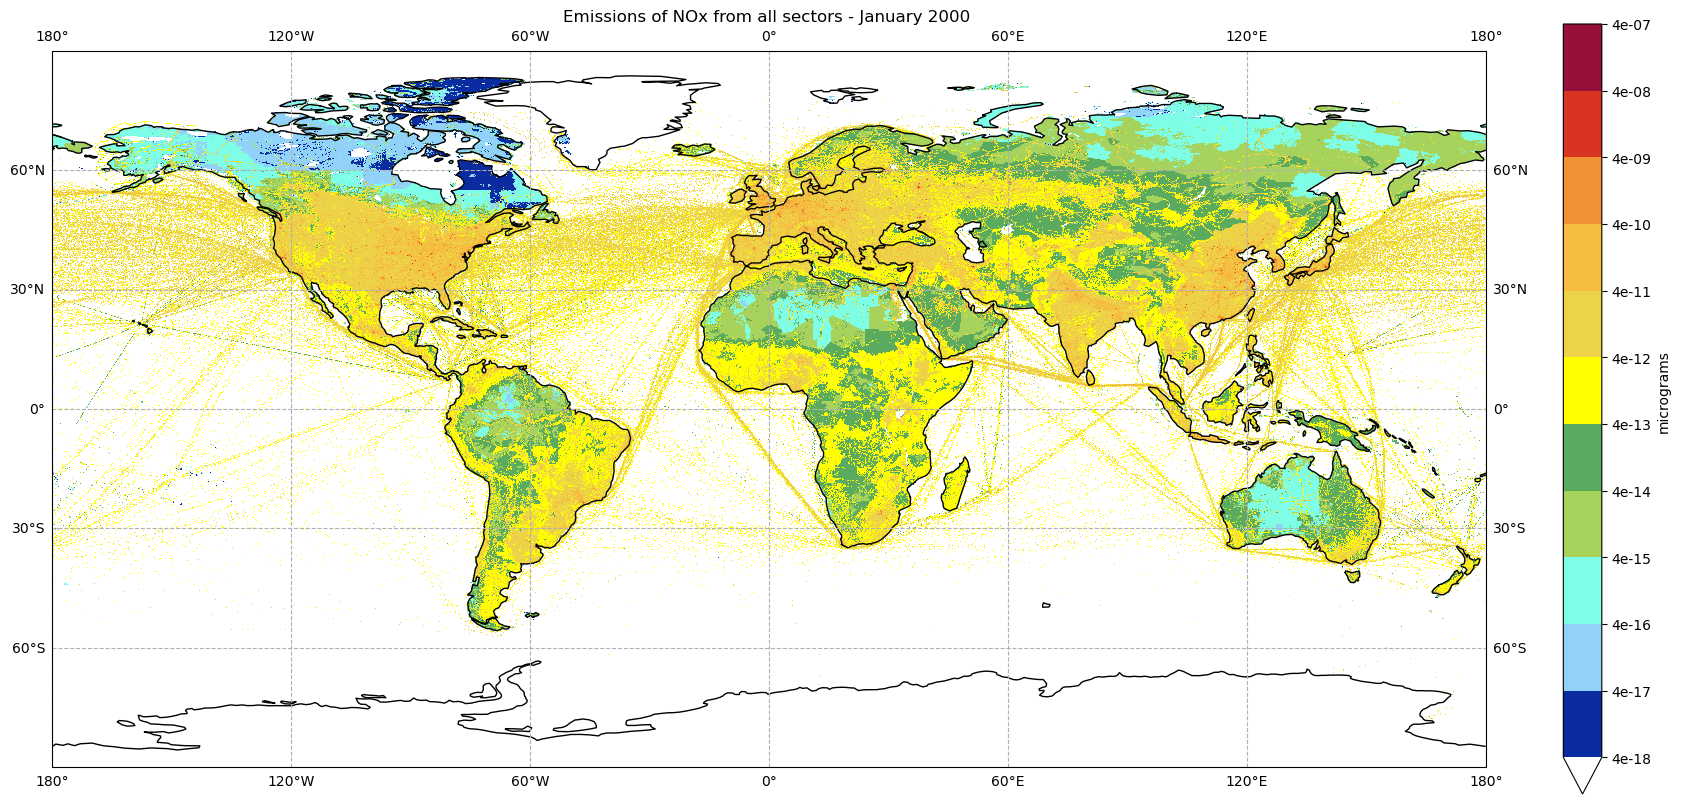

In [190]:
plot_emissions(nox2000_all_sectors_da, '2000', 0)

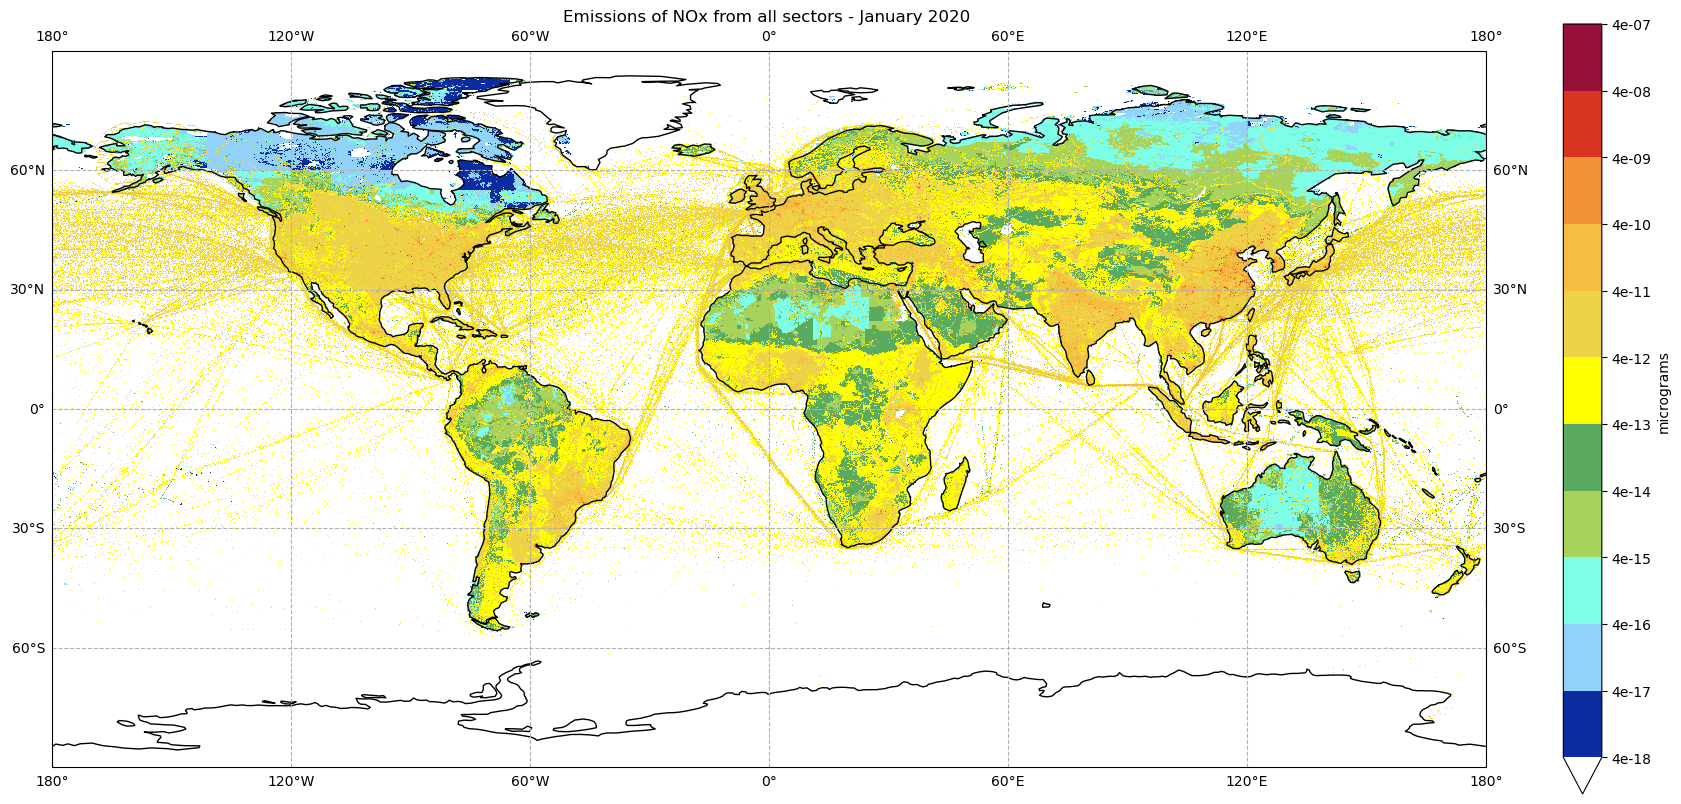

In [191]:
plot_emissions(nox2020_all_sectors_da, '2020', 0)

## Total flux for 2000 and 2020
We calculate the total emissions from all sector for each year

In [177]:
tot_nox_2000 = nox2000_all_sectors_da.sel(time=slice(0,11)).sum()
tot_nox_2000

<xarray.DataArray ()> Size: 4B
np.float32(0.00049034867)

In [176]:
tot_nox_2020 = nox2020_all_sectors_da.sel(time=slice(0,11)).sum()
tot_nox_2020

<xarray.DataArray ()> Size: 4B
np.float32(0.0005388539)

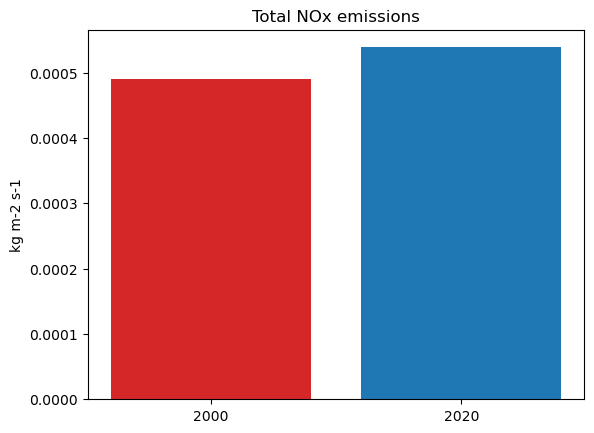

In [197]:
fig, ax = plt.subplots()

tot_emissions = [tot_nox_2000, tot_nox_2020]
bar_labels = ['2000', '2020']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(years, tot_emissions, label=bar_labels, color=bar_colors)

ax.set_ylabel('kg m-2 s-1')
ax.set_title('Total NOx emissions')
#ax.legend(title='Year')

plt.show()